<center>
    <b>RNAge Final Report</b>
    <br>
    <a>
        https://github.com/edgeslab/cs418-project-RNAge/blob/master/Final_Report.ipynb
    </a>
</center>

In [1]:
#Setting up the environment and importing the necessary data
%run Final_source_code/Init.py
%matplotlib inline

### Introduction

Omics are the holy grail of biological discovery. In short, it is the investigation of a certain class of components in a biological smaples. Genomics refers to the study of the whole genome, transcriptomics the whole of the RNA transcripts, and proteomics the whole of the proteins. These are only a few of the *omics*. This approach enables investigation of cellular processes with greater scope than ever before.

Our team of interdisciplinary students knew from the onset that we wanted to leverage this approach towards biological question. Rather than picking a mainstream topic such as cancer, our team chose to investigate human aging on a transcriptomic level. Our fundamental questions entering this project were as follows:
- What genes are associated in aging in different tissues?
- Are different tissues equally related to aging?

These are biologically significant questions as pre-omics research has focused on specific genes of interest or tissue-specific aging. We intend to compare the aging process between tissues and identify associated genes on an omic level.

### Data
<b>Source, Acquisition, Structure, and Granularity</b><br>
Our team used the Genotype-Tissue Expression (GTEx) project for our transcriptome data. Their efforts consist of genotyping and RNA-sequencing 11,688 tissue samples from 752 subjects across 53 tissues. This means our data is of **fine granularity** on a sample level, but the data is somewhat **coarse** on a subject level. Multiple samples are from single subjects, which means each sample is not entirely independent from one another.

We downloaded the data as the final gene-transcript counts, the number of reads experimentally aligned to a given gene. This looks like a **sparse** matrix with 56,202 features (genes). We also obtained sample metadata for the 11K samples and subject metadata for the 752 subjects.

<u>Data source:</u> https://gtexportal.org/home/datasets
<br>
- [Gene counts](https://storage.googleapis.com/gtex_analysis_v7/rna_seq_data/GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_reads.gct.gz)
    * 11,688 x 56,202 TSV
- [Sample metadata](https://storage.googleapis.com/gtex_analysis_v7/annotations/GTEx_v7_Annotations_SampleAttributesDS.txt)
    * 11,688 x 63 TSV
    * Features are related to quality control and experimental protocol.
- [Subject metadata](https://storage.googleapis.com/gtex_analysis_v7/annotations/GTEx_v7_Annotations_SubjectPhenotypesDS.txt)
    * 752 x 4 TSV
        1. Subject ID
        2. AGE group (20-29,30-39,40-49,50-59,60-69,70-79)
        3. Sex
        4. Hardy Scale death type (Violent fast, Natural fast, Intermediate, Slow, Vent)

These files are to be placed into the `data` directory, which is on the `.gitignore`. The gene count file must be Gunzipped.

#### Temporality, Faithfulness, and Scope
| EDA Principle | Finding |
|------|------|
| Temporality | Samples range from 2011 to 2015 from a variety of medical centers in the United States.    |
|   Faithfulness  | All samples were processed using Illumina TrueSeq RNA sequencing, a polyA selection method. This is an accepted and widely used method. |
| Scope| All samples are derived from cadavers of unknown genotype, meaning any analysis is blind to actual disease and other confounding biological effects.  |

<b>Pre-processing</b><br>
Our first objective in pre-processing was to merge subject metadata to sample metadata to enable age-based analysis. The following script merges and reorders the metadata according to gene count data. A `merged_meta.tsv` file for further analysis is output to `data`. For simplicity, merged_meta.tsv is packaged with the repository and can be simply copied into `data`.

In [17]:
#%run Final_source_code/dataSplit.py
!cp merged_meta.tsv data/

Our second objective was to normalize and split the gene count data into single tissue data sets. The raw counts were normalized in `R` using the *trimmed mean of M-values* (TMM) method in the `edgeR` package. This left us with normalized counts in the form of counts-per-million.

The results of normalization and splitting can be obtained [here](https://drive.google.com/file/d/1k06AGmZngzlpDBBAV4bOXgoB5iUUiiin/view?usp=sharing). The TSV files in this zip should be placed in `data/tissue-specific`.

In [6]:
#Running this script requires the following in R 3.5.2:
# Plyr, edgeR, limma, Glimma, data.table, stringr, foreach
#!Rscript Final_source_code/GTEx_input_final.R

<b>Data Cleaning</b><br>
Our *Data Cleaning* has four general steps resulting in the reduction of tissues to 16 and features (genes) to ~10,000.
<ol>
    <li>Remove samples without age.</li>
    <li>Choose tissues with counts more than 200.</li>
    <li>Filter genes with low variance and low raw count sums.</li>
</ol>

In [26]:
%run Final_source_code/DataCleaning.py
#The cleaned data for tissue type = COLON is as shown below

,ENSG00000227232,ENSG00000237683,ENSG00000241860,ENSG00000228463,ENSG00000225972,ENSG00000225630,ENSG00000237973,ENSG00000229344,ENSG00000240409,ENSG00000248527,...,ENSG00000198840,ENSG00000212907,ENSG00000198886,ENSG00000210191,ENSG00000198786,ENSG00000198695,ENSG00000210194,ENSG00000198727,ENSG00000210195,ENSG00000210196
GTEX-14PHX-1126-SM-5YYA5,7.587366,4.917485,0.381412,0.572117,0.871798,207.610493,30.077027,3.146645,0.517630,731.956055,...,1586.903721,1397.846177,15252.539888,0.027244,6151.324142,2462.093444,1.403050,7915.883925,0.095353,0.040866
GTEX-R53T-1326-SM-48FCQ,8.105863,0.899066,0.442397,0.000000,0.956149,246.786424,48.963408,7.763362,1.041775,888.405439,...,2095.165793,1701.703207,18799.636925,0.057084,2484.475551,575.930129,0.228334,10863.797257,0.014271,0.071354
GTEX-18A66-2426-SM-7KFSQ,5.911802,4.944861,0.660947,0.085678,1.897162,298.711234,41.186777,4.369593,0.526309,669.673746,...,1383.985880,1165.689840,12797.337625,0.000000,2173.768348,547.863699,0.305994,6091.089875,0.024480,0.036719
GTEX-14JG6-1626-SM-5YYBC,10.808170,1.883867,0.962560,0.165010,1.182573,481.857369,42.380127,5.074065,1.072566,1081.504540,...,3170.314020,2711.214312,27337.863361,0.013751,10252.621786,4202.081727,2.048877,14860.573673,0.082505,0.082505
GTEX-ZY6K-1226-SM-5GZYL,9.580124,1.302486,0.445587,0.257070,2.022280,345.947027,295.784194,8.071983,3.170524,1347.301374,...,2084.131181,2132.614493,25110.054082,0.017138,5283.618474,2080.515070,0.719795,13334.161923,0.051414,0.137104


### Data Analysis and Exploration

#### Visualization #1: Distribution of Age

We knew that some tissues had very few samples. To begin testing the relationships of the data, we needed to establish a threshold of minimum number of samples per tissue. This visualization shows us how the distribution of age groups for each tissue is relatively consistent. That is, the 40, 50, and 60 age groups are the most prevalent. This plot helped guide our decision to use only tissues with 200 samples as that always left more than one individual in each age group.

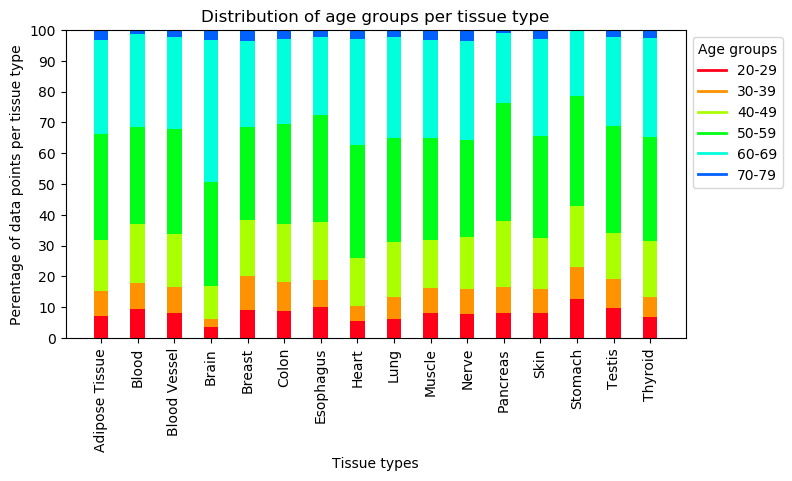

In [28]:
import matplotlib as mpl
from matplotlib.lines import Line2D
%run Final_source_code/AgeGroupViz.py

<b>Visualization #2: Differential Gene Expression Analysis</b><br>
Differential Gene Expression analysis is essentially a mean-difference test with a variance model for each gene. $LA vs. HA = \frac{(A1+A2+A3)}{3}-\frac{(A4+A5+A6)}{3}$ where LA means low-age and HA means high age, and where our null hypothesis for each gene was there is no difference in the gene expression between the two populations.

Unfortunately, there are no tools in Python to accomplish the mean-dispersion estimation/transformation needed to run statistical tests on RNA-seq count data. Instead, we used `R` and the `edgeR`, `Limma`, and `Glimma` packages. DGE results and mean-difference plots in their entirety are located in `DGE_results/`. Full results including interactive MD-plots and multi-dimensional scaling (MDS) plots can be obtained [here](https://drive.google.com/file/d/1X4OIkk_C9xLgfcfSap2LhsOcUnaP1sF5/view?usp=sharing). The heart [MDS-plot](./progress_plots/Heart/MDS-Plot.html) is included with this repository.

In [1]:
#!Rscript Final_source_code/GTEx_DGE_ALL.R
#!Rscript Final_source_code/GTEx_DGE_AGE.R

<tr>
    <td> <img src="./DGE_results/MDplot_all.png" alt="Drawing" style="width: 350px;"/> </td>
    <td> <img src="./DGE_results/EsophagusMDplot.png" alt="Drawing" style="width: 350px;"/> </td>
</tr>

Each point on these mean-difference (MD) plots represents a gene. The X location is the average expression in all samples; the Y location is the log2 difference between low age and high age samples. Thus, more extreme Y locations represent greater differences. The DGE analysis did not yield differentially expressed genes across all samples. However, some tissues exhibited a handful of DEG's, such as the esophagus. These genes are then associated with aging. In the case of the esophagus, there are six genes that are enriched in old age.

In the process of generating DGE results, we also generated MDS plots, which are a form of dimension reduction and visualization. These plots helped reveal 

**ML/Stats #0: Baseline Classifier**

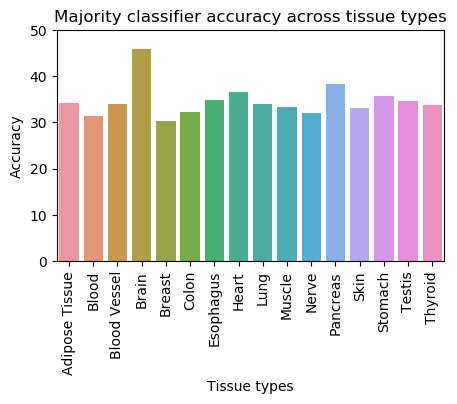

In [11]:
%run Final_source_code/GrptrendsMajorClassifier

**ML/Stats #1: Traditional Classification**

Figure(1080x360)


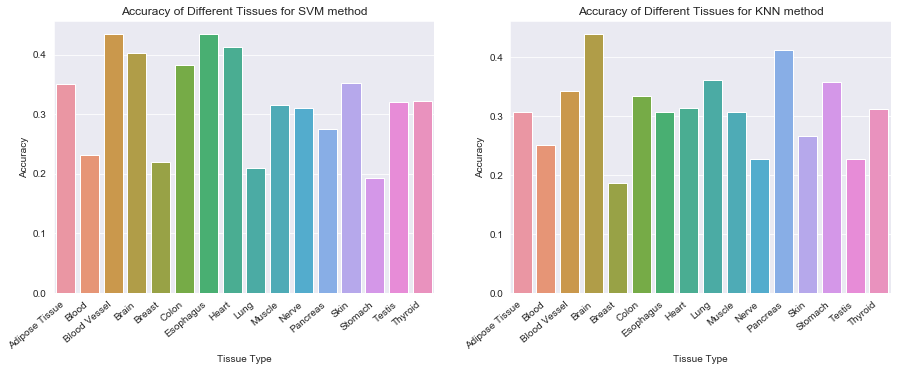

We made our classical ML models based on K-nearest neighbor (KNN) and Support Vector Machine (SVM). Here we see the accuracy of these two models for different tissue types. We can see that the accuracy for both models are almost the same and is less than 0.5.


In [60]:
%run ClassicML/plots.py
%matplotlib inline

print('We made our classical ML models based on K-nearest neighbor (KNN) and Support Vector Machine (SVM). Here we see the accuracy of these two models for different tissue types. We can see that the accuracy for both models are almost the same and is less than 0.5.')

**ML/Stats #2: Deep Learning**<br>
Model: TensorFlow Keras with 3 hidden layers (1024, 512 and 128 hidden neurons in each corresponding layer) with early stopping hyperparameter and Min-max normalization.

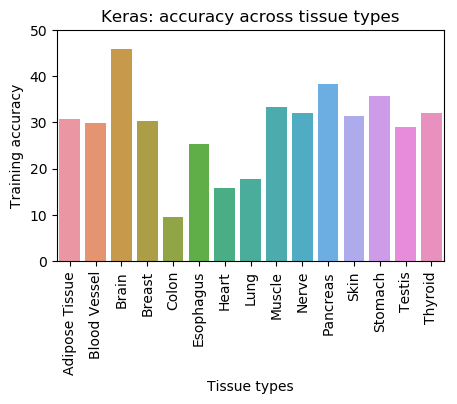

In [11]:
%run Final_source_code/dlModel.py

**ML/Stats #3: XGBoost and Primary Hypotheses Testing**<br>
XGBoost utilizes boosted trees to predict continuous or categorical variables. The following accuracies were achieved on a per-tissue basis.

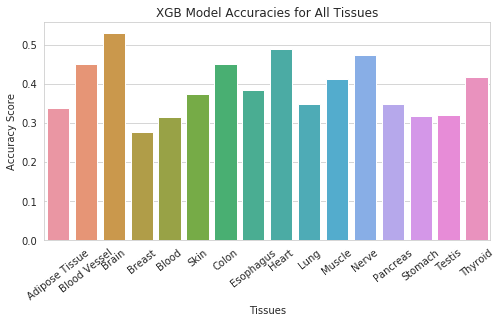

In [78]:
%run Final_source_code/XGB_accuracy.py

In [65]:
#%run Final_source_code/XGB_featImp.py

Despite weak DGE results, we gleaned some biological insight from feature importance analysis for the XGB model. All of the feature importance plots are output to `plots/`, but PTCHD4 appeared to be important for the classification of such tissues as the testis, colon, and blood vessels.
<img src="./plots/feat_imp.png" style="width: 1000px;"/> 

In [76]:
#%run Final_source_code/all_model_evaluation.py

The Mann-Whitney U test is a nonparametric test whether a random sample from one population is equally likely to be greater or less than a random sample from another population. We chose this test since we were not confident in assuming normal distribution for our model accuracies. We compared the accuracies for all models for all tissues with one another where each tissue was an accuracy population. This amounted to 105 comparison. We applied the Holm-Šídák correction for multiple hypothesis testing.

Though we observed differences in overall accuracy between some tissues, we did not find statistically significant differences. This means we fail to reject our primary hypothesis. The gene expression in tissues as they age are all about equally strongly associated with age. This makes sense given that we did not find many genes associated with aging in general.
<img src="./plots/mannwhitney.png" style="width: 1000px;"/>

<b>Conclusion</b><br>
Our analysis represents a novel approach to our central research question and hypotheses.